In [42]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.proportion as sp

sns.set(style="darkgrid")
plt.style.use("dark_background")
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [12]:
df = pd.read_csv('fatal-police-shootings-data.csv')
df = df.drop(columns=['name', 'manner_of_death', 'age', 'gender', 'city', 'state', 'signs_of_mental_illness', 'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact'])
display(df)

,id,date,armed,race,threat_level
0,3,1/2/15,gun,A,attack
1,4,1/2/15,gun,W,attack
2,5,1/3/15,unarmed,H,other
3,8,1/4/15,toy weapon,W,attack
4,9,1/4/15,nail gun,H,attack
...,...,...,...,...,...
7367,8037,5/13/22,toy weapon,NaN,attack
7368,8038,5/13/22,undetermined,NaN,attack
7369,8034,5/14/22,knife,NaN,other
7370,8035,5/14/22,knife,NaN,attack


In [13]:
df = df[df.race.isnull() == False]
df = df[df.race.isin(['B', 'W'])]
display(df)

,id,date,armed,race,threat_level
1,4,1/2/15,gun,W,attack
3,8,1/4/15,toy weapon,W,attack
5,11,1/4/15,gun,W,attack
7,15,1/6/15,gun,W,attack
8,16,1/6/15,unarmed,W,other
...,...,...,...,...,...
7251,7892,4/1/22,gun and vehicle,W,other
7264,7890,4/4/22,unarmed,B,attack
7279,7920,4/7/22,gun,W,attack
7290,7909,4/11/22,gun,B,other


In [25]:
df_2020 = df[df.date.str.slice(-2) == '20']
display(df_2020)

,id,date,armed,race,threat_level
4917,5344,1/1/20,gun,W,other
4918,5347,1/1/20,gun,W,attack
4920,5342,1/1/20,toy weapon,W,attack
4921,5339,1/2/20,gun,W,attack
4922,5348,1/2/20,gun,W,attack
...,...,...,...,...,...
5928,6471,12/29/20,unarmed,W,undetermined
5929,6670,12/29/20,gun,B,attack
5931,6462,12/30/20,gun,W,attack
5932,6474,12/30/20,gun,B,attack


there are 243 black men shot in 2020
there are 459 white men shot in 2020


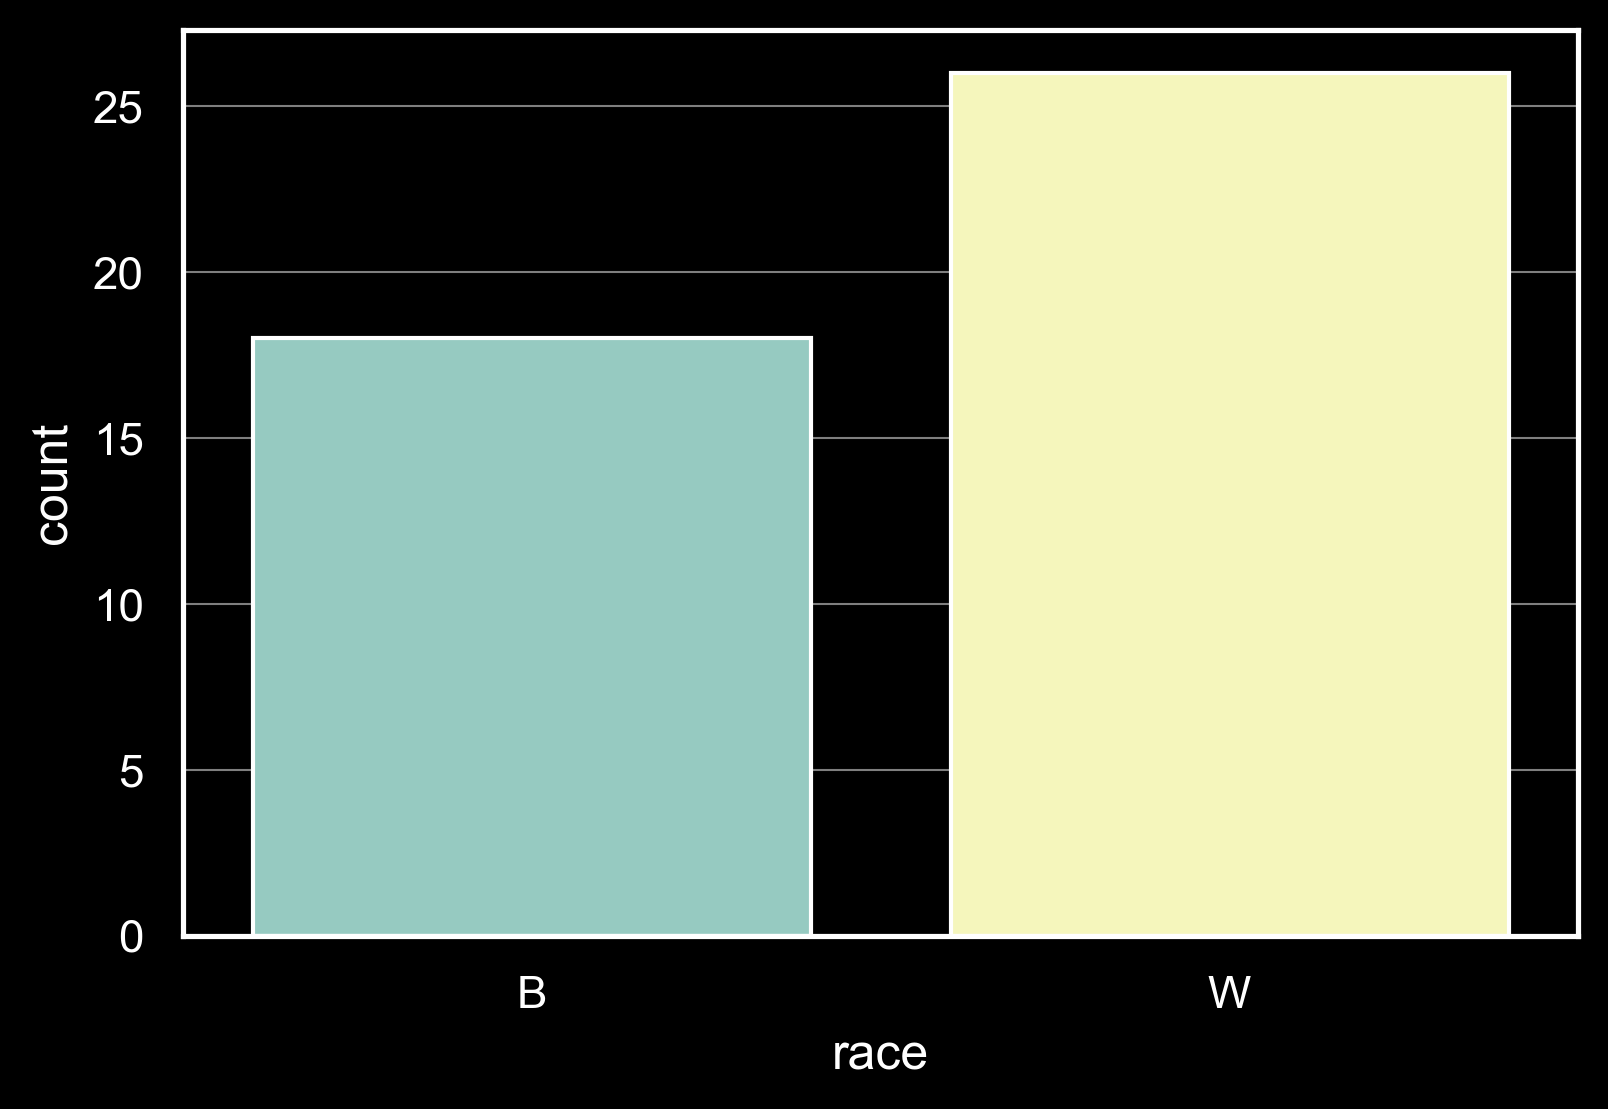

In [26]:
df_2020_unarmed = df_2020[df_2020.armed.isin(['unarmed'])]
ax = sns.countplot(x="race", data=df_2020_unarmed)

### Summary Statistics

In [35]:
black = df_2020[df_2020.race.isin(['B'])]
white = df_2020[df_2020.race.isin(['W'])]

num_black = (len(black))
num_black_unarmed = len(black[black.armed == "unarmed"])
prop_black_unarmed = len(black[black.armed == "unarmed"])/(len(black))

num_white = (len(white))
num_white_unarmed = len(white[white.armed == "unarmed"])
prop_white_unarmed = len(white[white.armed == "unarmed"])/(len(white))

print(f'{num_black} black men shot in 2020, with {num_black_unarmed} being unarmed. Meaning a proportion of {prop_black_unarmed}')

print(f'{num_white} white men shot in 2020, with {num_white_unarmed} being unarmed. Meaning a proportion of {prop_white_unarmed}')

243 black men shot in 2020, with 18 being unarmed. Meaning a proportion of 0.07407407407407407
459 white men shot in 2020, with 26 being unarmed. Meaning a proportion of 26


### Two-Proportion Z-interval
**conditions:**
- Random: The year chosen, 2020, was chosen randomly from the data set, meaning that the random condition is met
- Success/Failure condition: There are more than 10 armed blacks and 10 unarmed blacks. There are more than 10 armed whites and 10 unarmed whites.
- Sample size: since we are only looking at one year, 2020, it is not possible that this comprises more than 10% of the population, since there have been over 10 years of policing where deadly force involved.

In [45]:
interval = sp.confint_proportions_2indep(num_black_unarmed, num_black, num_white_unarmed, num_white, compare="diff", alpha = 0.05, correction=False)
print(f'The true difference in proportion (blacks - whites) is between {interval} at a 95% confidence level')

The true difference in proportion (blacks - whites) is between (-0.019193754696038477, 0.06113785095986793) at a 95% confidence level


In [64]:
black = df_2020_unarmed[df_2020_unarmed.race.isin(['B'])]
white = df_2020_unarmed[df_2020_unarmed.race.isin(['W'])]

display(black)
display(white)

,id,date,armed,race,threat_level
4992,5434,1/27/20,unarmed,B,attack
4998,5441,1/29/20,unarmed,B,attack
5099,5620,3/6/20,unarmed,B,attack
5116,5663,3/12/20,unarmed,B,undetermined
5117,5626,3/13/20,unarmed,B,other
5146,5647,3/20/20,unarmed,B,attack
5235,5862,4/23/20,unarmed,B,attack
5257,5778,5/1/20,unarmed,B,attack
5326,5873,5/23/20,unarmed,B,attack
5333,5841,5/25/20,unarmed,B,other


,id,date,armed,race,threat_level
5062,5576,2/24/20,unarmed,W,other
5092,5605,3/4/20,unarmed,W,attack
5101,5657,3/6/20,unarmed,W,attack
5107,5615,3/8/20,unarmed,W,other
5109,5623,3/8/20,unarmed,W,attack
5161,5719,3/26/20,unarmed,W,other
5200,5736,4/9/20,unarmed,W,attack
5202,5738,4/10/20,unarmed,W,other
5256,5777,5/1/20,unarmed,W,other
5317,5824,5/19/20,unarmed,W,attack
